In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(42)

In [5]:
# load dataset
#dataset = sio.loadmat('/Users/yang/Desktop/IL2232/MyCode/PythonVersionHMM/dataset/lympho.mat')
dataset = sio.loadmat('./dataset/lympho.mat')

# first 6 data are outliers => extract them
n_anomaly = 6
lengthX = len(dataset['X'])
lengthY = len(dataset['y'])
outlierX = dataset['X'][:n_anomaly]
outlierY = dataset['y'][:n_anomaly] # all ones
nomialX = dataset['X'][n_anomaly:lengthX]
nomialY = dataset['y'][n_anomaly:lengthY]
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    nomialX, nomialY, test_size = 0.3)
X_test_anomaly = np.concatenate((outlierX, X_test), axis = 0)
y_test_anomaly = np.concatenate((outlierY, y_test), axis = 0)

# concatenate the data into sequences used for fit and predict
X_train_arr = X_train[0]
X_test_anomaly_arr = X_test_anomaly[0]
X_test_arr = X_test[0]
X_train_len = [len(X_train[0])]
X_test_len = [len(X_test[0])]
X_test_anomaly_len = [len(X_test[0])]

for i in range(X_train.shape[0] - 1):
    X_train_arr = np.concatenate([X_train_arr, X_train[i + 1]])
    X_train_len = np.concatenate([X_train_len, [len(X_train[i + 1])]])

for i in range(X_test_anomaly.shape[0] - 1):
    X_test_anomaly_arr = np.concatenate([X_test_anomaly_arr, X_test_anomaly[i + 1]])
    X_test_anomaly_len = np.concatenate([X_test_anomaly_len, [len(X_test_anomaly[i + 1])]])

for i in range(X_test.shape[0] - 1):
    X_test_arr = np.concatenate([X_test_arr, X_test[i + 1]])
    X_test_len = np.concatenate([X_test_len, [len(X_test[i + 1])]])


<class 'numpy.ndarray'>


In [ ]:
my_file = open("./dataset/Test_anomaly_set_array.txt", "w")
for element in X_test_anomaly_arr:
    my_file.write(str(int(element)) + '\n')
my_file.close()
# Test_anomaly_set_array.txt is the file stores the data array

my_file = open("./dataset/Test_anomaly_set_array_size.txt", "w")
my_file.write(str(len(X_test_anomaly_arr)))
my_file.close()
# Test_anomaly_set_array_size.txt is the file stores the size of data array

my_file = open("./dataset/Test_anomaly_set_length.txt", "w")
for element in X_test_anomaly_len:
    my_file.write(str(int(element)) + '\n')
my_file.close()
# Test_anomaly_set_length.txt is the file stores the length array (length of each samples)

my_file = open("./dataset/Test_anomaly_set_samples.txt", "w")
my_file.write(str(len(X_test_anomaly_len)))
my_file.close()
# Test_anomaly_set_samples.txt is the file stores the number of samples

my_file = open("./dataset/Test_anomaly_set_label.txt", "w")
for element in y_test_anomaly:
    my_file.write(str(int(element)) + '\n')
my_file.close()
# Test_anomaly_set_label.txt is the file stores the labels of samples

In [4]:
# initialize the model
n_components = 30
n_features = 8
model = hmm.MultinomialHMM(n_components = n_components)

# initialize number of features V
model.n_features = n_features

# initialize the starte probability matrix pi
# always start from state 0
# model.startprob_ = np.concatenate(
#   [[1.], np.zeros(n_components - 1)])
# model.startprob_ = np.random.dirichlet(np.ones(n_components))

# initialize the transission probability matrix
# for i in range(n_components):
#    transmat[i] = np.random.dirichlet(np.ones(n_components))
#    emissionprob[i] = np.random.dirichlet(n_features)
    
# model.transmat_ = transmat
# model.emissionprob_ = emissionprob

In [5]:
# label preprocessing
le = preprocessing.LabelEncoder()
le.fit([1., 2., 3., 4., 5., 6., 7., 8.])

LabelEncoder()

In [6]:
# train the model
data = X_train_arr
data = le.transform(data)
model.fit(data.reshape(-1, 1), X_train_len)

MultinomialHMM(n_components=30,
               random_state=RandomState(MT19937) at 0x7FEB992C5A40)

In [10]:
# score the model
data = X_test_arr
data = le.transform(data)
model.score(data.reshape(-1, 1), X_test_len)

-962.4703294481463

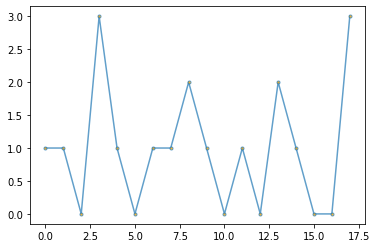

[23 27 29 23 21  1  2 12  9  0 28 13  1 20  0 26 25 16]


In [8]:
# Generate samples
X, Z = model.sample(n_samples = 18, random_state = 13)

# Plot the sampled data
plt.plot(X[:, 0], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

plt.show()

print(Z)

In [26]:
# peek at the test set
for i in range(len(X_test)):
    data = X_test[i]
    data = le.transform(data)
    print(model.score(data.reshape(-1, 1)))
print("---------------")
for i in range(n_anomaly):
    data = X_test_anomaly[i]
    data = le.transform(data)
    print(model.score(data.reshape(-1, 1)))

-20.51952043537592
-18.292108515348
-20.519603341861426
-18.228023431915293
-20.60238612541898
-22.753387741565376
-19.253206788210832
-28.93455255685233
-22.66102774063057
-20.99813332687412
-22.682694861695957
-26.024586729164213
-21.174849337369658
-24.850375556230865
-28.621963999488013
-21.562285870660578
-25.011763058677996
-18.401982269326528
-22.624076447224397
-21.332046951910964
-20.683025846208935
-18.464517267055456
-18.232511598816707
-21.31815909318646
-18.095840762719586
-20.476870642360808
-19.0164515772387
-20.48288271791866
-25.57642007600746
-20.477200183965977
-21.480761695287736
-31.34248395246405
-24.1921813487588
-22.09967224923515
-25.3858022877548
-19.66852081821912
-20.078423544673257
-19.390527818026108
-20.603063506538444
-22.665253405653985
-26.62973509285614
-22.510744066409597
-26.302422886406504
---------------
-14.816065973906362
-18.04803794697947
-25.432017826837374
-28.859909466524424
-27.001119347332164
-29.003160650614078


In [37]:
# do anomaly detection and obtain precision, recall and F-score
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(X_test_anomaly)):
    data = X_test_anomaly[i]
    data = le.transform(data)
    if(model.score(data.reshape(-1, 1)) < -25.):
        positive = 1
    else:
        positive = 0
    if(positive):
        if(y_test_anomaly[i] == 1):
            TP += 1
        else:
            FP += 1
    else:
        if(y_test_anomaly[i] == 0):
            TN += 1
        else:
            FN += 1
print("TP =", TP, "TN =", TN, "FP =", FP, "FN =", FN )
Precision = "{:.0%}".format(TP / (TP + FP))
Recall = "{:.0%}".format(TP / (TP + FN))
Fscore = "{:.0%}".format(2 * TP / (2 * TP + FP + FN))
print("Precision =", Precision, "Recall =", Recall, "Fscore =", Fscore)

TP = 4 TN = 34 FP = 9 FN = 2
Precision = 31% Recall = 67% Fscore = 42%


In [41]:
# save the model to file
import pickle
with open("HMMModel.pkl", "wb") as file: pickle.dump(model, file)

In [42]:
# load the model from file
import pickle
with open("HMMModel.pkl", "rb") as file: pickle.load(file)

In [66]:
# store the model parameters
my_file = open("./Model_Parameters/N_Features.txt", "w")
my_file.write(str(model.n_features))
my_file.close()

my_file = open("./Model_Parameters/N_Components.txt", "w")
my_file.write(str(model.n_components))
my_file.close()

my_file = open("./Model_Parameters/Initial_Probability_Matrix.txt", "w")
np.savetxt(my_file, model.startprob_)
my_file.close()

my_file = open("./Model_Parameters/Transition_Probability_Matrix.txt", "w")
for row in model.transmat_:
    np.savetxt(my_file, row)
my_file.close()

my_file = open("./Model_Parameters/Emission_Probability_Matrix.txt", "w")
for row in model.emissionprob_:
    np.savetxt(my_file, row)
my_file.close()